# -*- coding: utf-8 -*-
"""
Created on Wed Mar 26 11:55:40 2025

@author: mrsag
"""

Simulation of Thomson parabola for given 
1. Electric field (E) (taken from V/d)
2. Magnetic Field (B)
3. Electric field length (lE)
4. Magnetic field length (lB)
5. Distance of screen from electric field region endpoint (DE)
6. Distance of screen from magnetic field region endpoint (DB)
7. Charge of the particle in terms of proton charge (q)
8. Mass of particle (in terms of electron mass)

In [121]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from skimage import io
import scipy.integrate as integrate
from Curve_fitting_with_scipy import polynomial_fit as pft
import glob
import random 

import matplotlib as mpl
mpl.rcParams['font.family'] = 'serif'
mpl.rcParams['font.serif'] = 'Times New Roman'
mpl.rcParams['font.size'] = 12
#mpl.rcParams['font.weight'] = 'bold'
#mpl.rcParams['font.style'] = 'italic'  # Set this to 'italic'
mpl.rcParams['figure.dpi']=300 # highres display

In [122]:
# Defining constants:
cm = 1e-2
mm = 1e-3
e = 1.6e-19
me = 9.11e-31
keV_to_Joule = 1.6e-16

In [123]:
# Input parameters:

V = 12000 # Potential difference in between the cathode and anode (V)   (in Volts)
d = 1.3*cm # distance over which the electric field is being applied (in cm)
E_field = V/d # electric field (in Volts/m))
B_field = 0.45 # Magnetic Field (B)  (in Tesla)
lE = 12*cm # Electric field length (lE)  (in cm)
lB = 5*cm  # Magnetic field length (lB)  (in cm)
DE = 18.8*cm # Distance of screen from electric field region endpoint (DE)  (in cm)
DB = (32.3+1.75)*cm # Distance of screen from magnetic field region endpoint (DB)  (in cm)
qp = 1*e # Charge of proton in terms of proton charge (q)
mH = 1836*me # Mass of particle (in terms of electron mass)


In [124]:
class particle():
    def __init__(self,x,y,z,vx,vy,vz,q,m):
        self.x = x
        self.y = y
        self.z = z
        self.vx = vx
        self.vy = vy
        self.vz = vz
        self.q = q
        self.m = m
        self.v = np.sqrt(vx**2+vy**2+vz**2)
        self.Energy = m*self.v**2/2
    

    def propagator(self):
        global t
        global dt
        global B_field
        global E_field
        global DE
        global DB
        global lE
        global lB

        broke = False

        for i in range(len(t)):
            if(self.z>=0):
                broke = True
                break
            
            if(DE+lE>=abs(self.z)>DE):
                E = E_field
            else:
                E = 0
            if(DB+lB>=abs(self.z)>DB):
                B = B_field
            else:
                B = 0

            Fx = self.q*E
            Fy = self.q*self.vz*B
            Fz = -self.q*self.vy*B

            ax,ay,az = Fx/self.m, Fy/self.m, Fz/self.m

            self.x += self.vx*dt + ax*dt**2/2
            self.y += self.vy*dt + ay*dt**2/2
            self.z += self.vz*dt + az*dt**2/2

            self.vx += ax*dt
            self.vy += ay*dt
            self.vz += az*dt


            self.v = np.sqrt(self.vx**2+self.vy**2+self.vz**2)
            self.E = self.m*self.v**2/2

        if broke:
            return self.x,self.y,self.z  #,self.z,self.E,self.v
        else:
            return np.nan,np.nan,self.z

In [125]:
class proton(particle):
    def __init__(self, x, y, z, vx, vy, vz):
        super().__init__(x, y, z, vx, vy, vz, q=qp, m=mH)  


class C1(particle):
    def __init__(self, x, y, z, vx, vy, vz):
        super().__init__(x, y, z, vx, vy, vz, q=1*qp, m=12*mH)

class C2(particle):
    def __init__(self, x, y, z, vx, vy, vz):
        super().__init__(x, y, z, vx, vy, vz, q=2*qp, m=12*mH)  

class C3(particle):
    def __init__(self, x, y, z, vx, vy, vz):
        super().__init__(x, y, z, vx, vy, vz, q=3*qp, m=12*mH)  

class C4(particle):
    def __init__(self, x, y, z, vx, vy, vz):
        super().__init__(x, y, z, vx, vy, vz, q=4*qp, m=12*mH)  

class C5(particle):
    def __init__(self, x, y, z, vx, vy, vz):
        super().__init__(x, y, z, vx, vy, vz, q=5*qp, m=12*mH)  

class C6(particle):
    def __init__(self, x, y, z, vx, vy, vz):
        super().__init__(x, y, z, vx, vy, vz, q=6*qp, m=12*mH) 

class O1(particle):
    def __init__(self, x, y, z, vx, vy, vz):
        super().__init__(x, y, z, vx, vy, vz, q=1*qp, m=16*mH) 

class O2(particle):
    def __init__(self, x, y, z, vx, vy, vz):
        super().__init__(x, y, z, vx, vy, vz, q=2*qp, m=16*mH) 

class O3(particle):
    def __init__(self, x, y, z, vx, vy, vz):
        super().__init__(x, y, z, vx, vy, vz, q=3*qp, m=16*mH) 

class O4(particle):
    def __init__(self, x, y, z, vx, vy, vz):
        super().__init__(x, y, z, vx, vy, vz, q=4*qp, m=16*mH)  

class O5(particle):
    def __init__(self, x, y, z, vx, vy, vz):
        super().__init__(x, y, z, vx, vy, vz, q=5*qp, m=16*mH) 

class O6(particle):
    def __init__(self, x, y, z, vx, vy, vz):
        super().__init__(x, y, z, vx, vy, vz, q=6*qp, m=16*mH) 

class O7(particle):
    def __init__(self, x, y, z, vx, vy, vz):
        super().__init__(x, y, z, vx, vy, vz, q=7*qp, m=16*mH) 

class O8(particle):
    def __init__(self, x, y, z, vx, vy, vz):
        super().__init__(x, y, z, vx, vy, vz, q=8*qp, m=16*mH) 

In [ ]:
species = ["H+","C1+","C2+","C3+","C4+","C5+","C6+","O1+","O2+","O3+","O4+","O5+","O6+","O7+","O8+"]
m_species = [mH,12*mH,12*mH,12*mH,12*mH,12*mH,12*mH,16*mH,16*mH,16*mH,16*mH,16*mH,16*mH,16*mH,16*mH]

low_energy_array = [1000,4000,5000,7000,8000,7000,12000,4000,5000,7000,8000,7000,12000,7000,12000]
high_energy_array = [25000,50000,50000,50000,50000,50000,50000,70000,70000,70000,70000,70000,70000,70000,70000]
no_of_particle = 5000
steep_array = [3,4,3,5,2,6,3,3,4,5,2,3,6,4,2] # np.ones(len(species))*3.0

Energy = []
# Parameters
for j in range(len(species)):
    low_energy  = low_energy_array[j]
    high_energy = high_energy_array[j]
    no_of_particle = no_of_particle 
    steep = steep_array[j]  # Smaller = sharper drop-off near 500

    # Generate raw exponential values
    raw = np.linspace(0,10,no_of_particle)
    # Normalize to [0, 1]
    raw = np.exp(-raw/steep)

    M1 = np.array([[low_energy, (high_energy-low_energy)],
                    [low_energy, raw[-1]*(high_energy-low_energy)]])

    b = np.array([high_energy,low_energy])

    sol = np.linalg.solve(M1,b)
    alpha = sol[0]
    beta = sol[1]

    # Scale to [500, 40000]
    Energy_j = (alpha*low_energy + beta * raw * (high_energy - low_energy))*keV_to_Joule 
    Energy.append(Energy_j)

Energy = np.array(Energy)
t_max_arr = []

v = np.zeros(shape=(len(species),len(Energy[0])))
sx = [[0] for _ in range(len(species))]
sy = [[0] for _ in range(len(species))]
sz = [[0] for _ in range(len(species))]
sE = [[0] for _ in range(len(species))]

for j in range(len(species)):
    v[j] = np.sqrt(2*Energy[j]/m_species[j]) # calculates in Si unit
    t_max_arr.append(10*max([lE+DE,lB+DB])/min(v[j]))

x = 0
y = 0
z = -max([lE+DE,lB+DB])

vx = 0
vy = 0

time_resolution = 10000

class_names = ["proton", 
                "C1", "C2", "C3", "C4", "C5", "C6",
                "O1", "O2", "O3", "O4", "O5", "O6", "O7", "O8"]

for i in range(len(Energy[0])):
    for j in range(len(species)):
        t_max = t_max_arr[j]
        t = np.linspace(0,t_max,time_resolution)
        dt = np.diff(t)[0]

        if 0 <= j < len(class_names):
            p = globals()[class_names[j]](x, y, z, vx, vy, vz=v[j][i])


        dx,dy,dz = p.propagator()

        if(dx!= np.nan or dy!= np.nan):
            sx[j].append(dx/mm)
            sy[j].append(dy/mm)
            sz[j].append(dz/mm)
            sE[j].append(p.Energy)
        else:
            sx[j].append(np.nan)
            sy[j].append(np.nan)
            sz[j].append(dz/mm)
            sE[j].append(p.Energy)

for j in range(len(species)):
    sE[j][0] = np.max(sE[j])*1.5

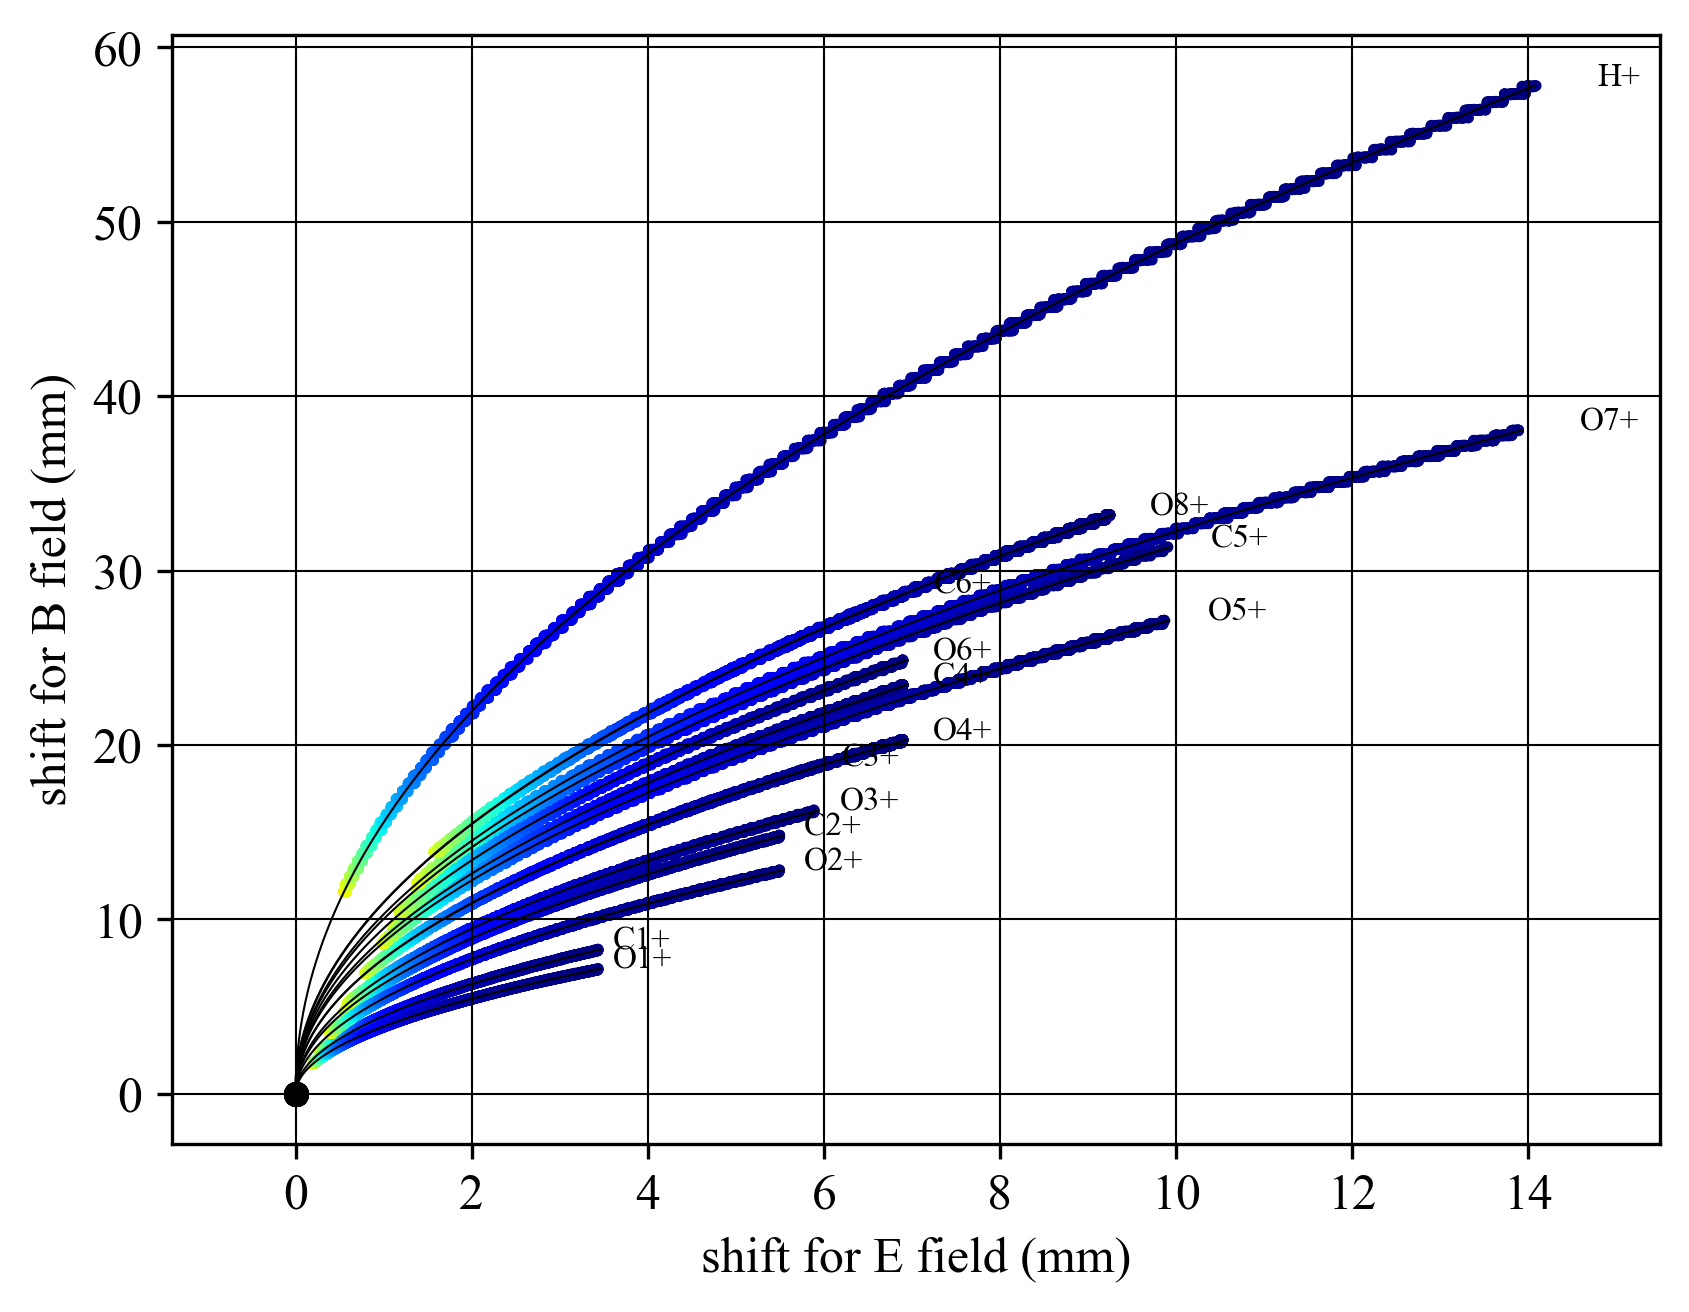

In [127]:
sx,sy,sE = np.array(sx),np.array(sy),np.array(sE)

for j in range(len(species)):
    # Get sorted indices of x
    sorted_indices = np.argsort(sx[j])

    # Apply the same indices to all arrays
    sx[j] = sx[j][sorted_indices]
    sy[j] = sy[j][sorted_indices]
    sE[j] = sE[j][sorted_indices]

    coeffs = np.polyfit(sy[j], sx[j], 2)  # Quadratic fit

    x_parabola = np.linspace(np.min(sy[j]),np.max(sy[j]),1000)
    y_parabola = np.polyval(coeffs, x_parabola)


    cutoff_DE = sx[j][1]
    cutoff_DB = sy[j][1]
    cutoff_D = np.sqrt(sx[j][1]**2 + sy[j][1]**2)
    cutoff_E = sE[j][1]/keV_to_Joule/1000


    plt.scatter(sx[j],sy[j],c=np.array(sE[j])/keV_to_Joule/1000,s=3,cmap="jet")
    # plt.hist(sE[1:]/keV_to_Joule/1000,weights = np.ones_like(sE[1:])/np.histogram(sE[1:], bins=100)[0].max()*np.max(sy),bins=100)
    plt.plot(sx[j][:1],sy[j][:1],"ko",markersize=5)
    # plt.plot(sx[j][:2],sy[j][:2],"b-",lw=1)
    # plt.text(x=sx[j][1],y=sy[j][1]/2,s=f"cutoff: {np.sqrt(sx[j][1]**2+sy[j][1]**2):.2f} mm\nE: {sE[j][1]/keV_to_Joule/1000 :.2f} MeV")
    plt.text(x=sx[j][-1]*1.05,y=sy[j][-1],s=f"{species[j]}", fontsize=8)
    plt.plot(y_parabola,x_parabola,"k-",lw=0.5)
    plt.grid(lw=0.5,color="k")
    # plt.colorbar(label = "Energy (MeV)")
    plt.xlabel("shift for E field (mm)")
    plt.ylabel("shift for B field (mm)")
    plt.xlim(-np.max(sx)/10,np.max(sx)*1.1)
plt.show()

C:\Users\mrsag\AppData\Local\Temp\ipykernel_7076\2118278483.py:37: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax1.legend()


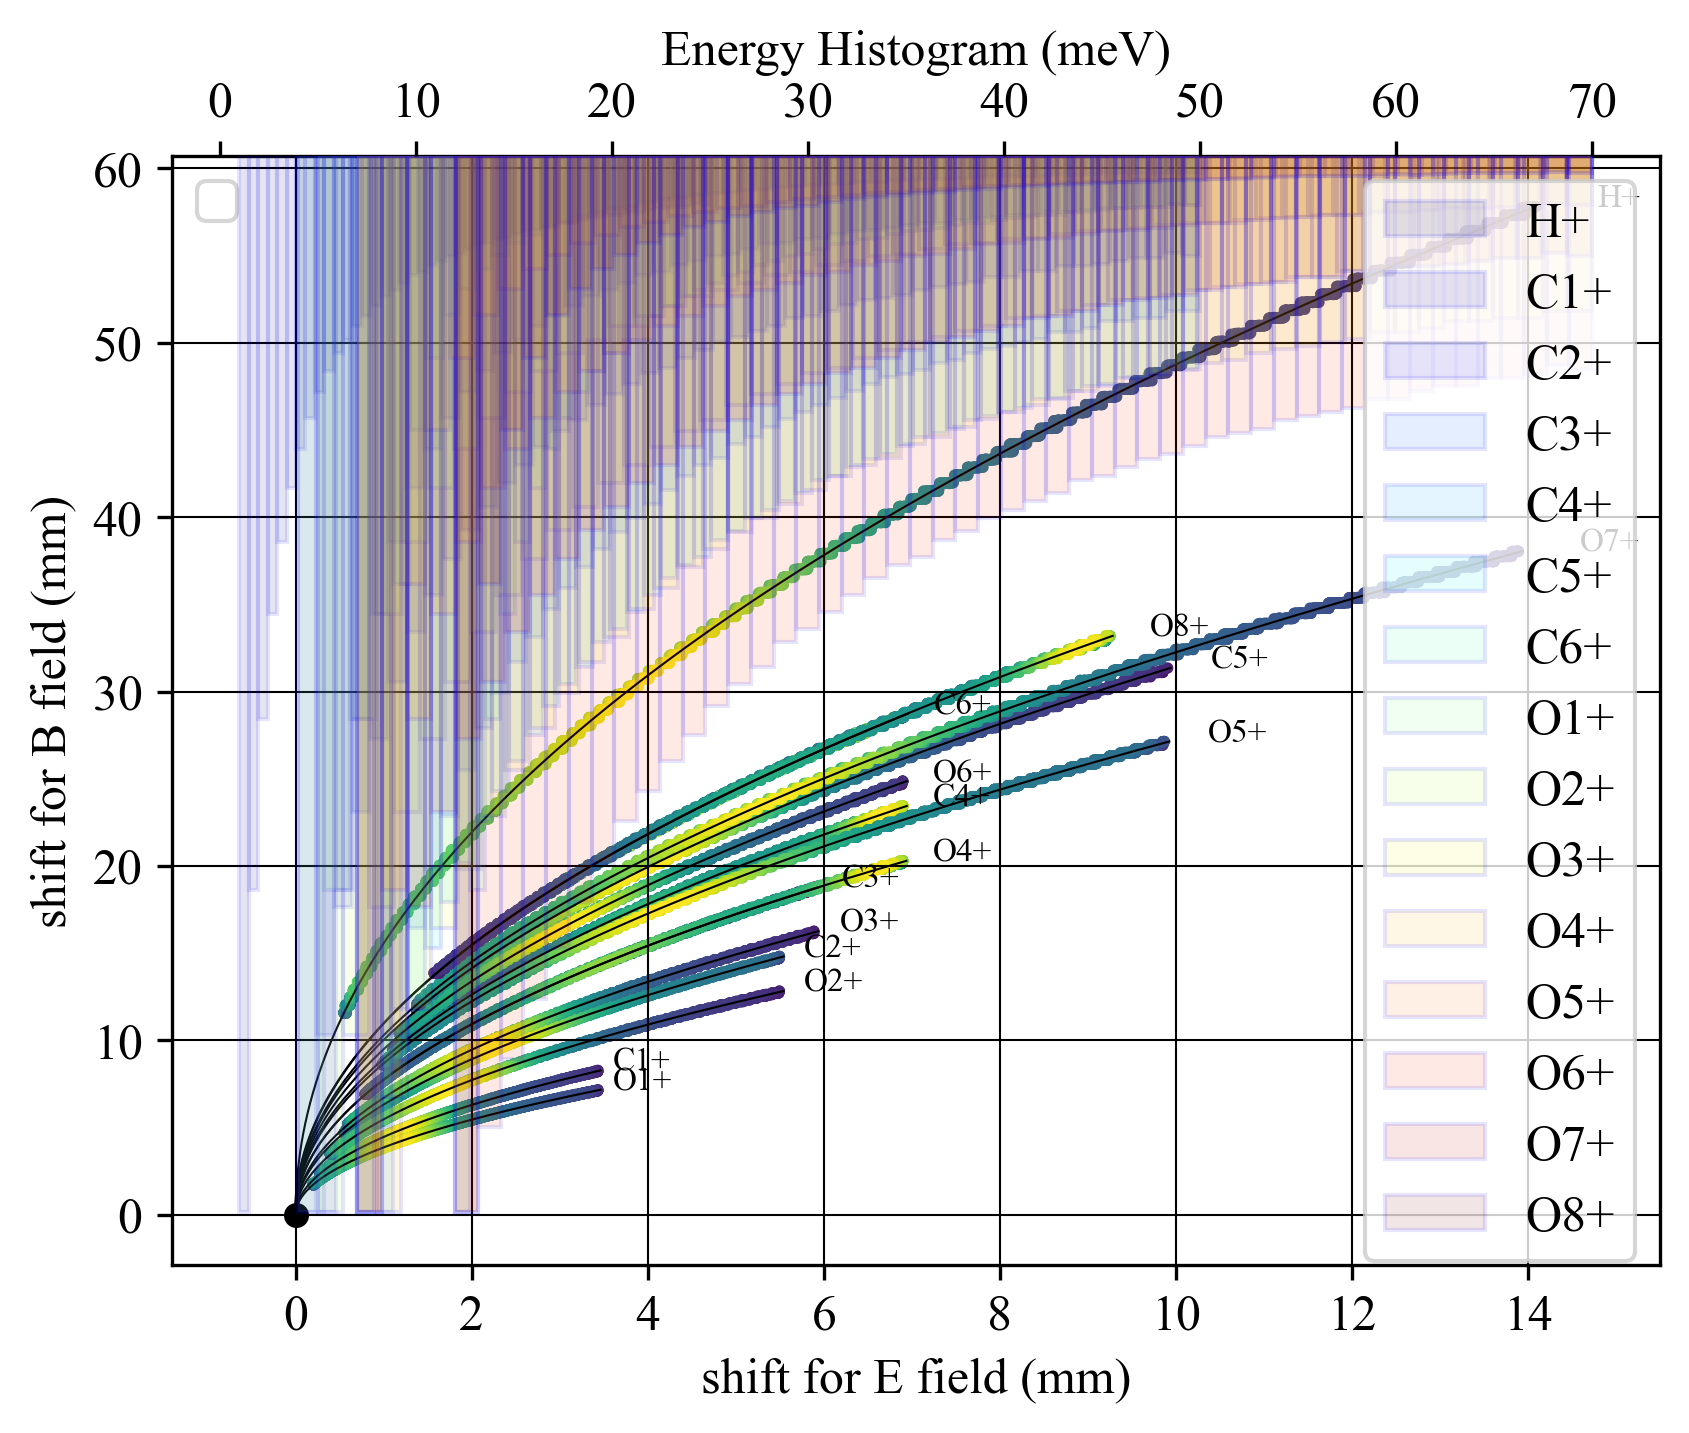

In [128]:
from scipy.stats import gaussian_kde

fig, ax1 = plt.subplots()

for j in range(len(species)):
    # Extract current species data
    sx_j = sx[j]
    sy_j = sy[j]
    sE_j = sE[j]

    coeffs = np.polyfit(sy[j], sx[j], 2)  # Quadratic fit

    x_parabola = np.linspace(np.min(sy[j]),np.max(sy[j]),1000)
    y_parabola = np.polyval(coeffs, x_parabola)


    # Density calculation
    xy = np.vstack([sx_j, sy_j])
    z = gaussian_kde(xy)(xy)
    idx = z.argsort()
    sx_j, sy_j, z = sx_j[idx], sy_j[idx], z[idx]
    z = np.array(z) / max(z)

    # Scatter plot with species color
    sc = ax1.scatter(sx_j, sy_j, c=z, s=3)
    ax1.text(x=sx[j][-1]*1.05,y=sy[j][-1],s=f"{species[j]}", fontsize=8)
    # ax1.plot([0, cutoff_DE], [0, cutoff_DB], "b-", lw=1)
    ax1.plot(y_parabola, x_parabola, "k-",lw=0.5)

# Add global references once
ax1.plot([0], [0], "ko", markersize=5)

ax1.grid(lw=0.5, color="k")
ax1.set_xlabel("shift for E field (mm)")
ax1.set_ylabel("shift for B field (mm)")
ax1.set_xlim(-np.max(sx)/10,np.max(sx)*1.1)
ax1.legend()

# Create a new inset axes on top, same width, no shared y
ax2 = fig.add_axes(ax1.get_position(), frameon=False)
ax2.set_facecolor("none")


colors = plt.cm.jet(np.linspace(0, 1, len(species)))  # distinct color per species
for j in range(len(species)):
    # Calculate histogram data
    hist_vals, bin_edges = np.histogram(sE[j][1:]/keV_to_Joule/1000, bins=50)
    bin_centers = 0.5 * (bin_edges[:-1] + bin_edges[1:])
    weights = hist_vals / hist_vals.max()

    # Plot histogram as bars
    ax2.bar(bin_centers, weights, width=bin_edges[1] - bin_edges[0],
            color=colors[j], edgecolor="blue", alpha=0.1,label=f"{species[j]}")

    # Invert y-axis only for ax2
    ax2.invert_yaxis()

    # Hide x-axis of ax2
    ax2.xaxis.set_ticks_position('top')
    ax2.xaxis.set_label_position('top')
    ax2.set_xlabel("Energy Histogram (meV)")

    # Show y-axis only on the right
    ax2.tick_params(axis='y', which='both', left=False, right=False, labelleft=False)
    ax2.yaxis.set_label_position("right")

    # Hide background elements of ax2
    ax2.spines['left'].set_visible(False)
    ax2.spines['bottom'].set_visible(False)
    ax2.spines['right'].set_visible(True)
    ax2.spines['top'].set_visible(True)

ax2.legend()
plt.show()


In [129]:
j=8
class_name = globals()[f"O{j - 6}"]
print(class_name)
p = class_name(x, y, z, vx, vy, vz=v[j][i])


<class '__main__.O2'>


In [130]:
p.m

2.6761536e-26